In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import copy

In [3]:
data_df = pd.read_csv('aiida_ads_data.csv')
curated_df = copy.deepcopy(data_df[["o2_5bar", "o2_140bar", "co2_0.001bar", "co2_30bar", "n2_0.001bar", "n2_30bar", 
                       "h2_77K_5bar", "h2_77K_100bar", "h2_298K_5bar", "h2_298K_100bar", "ch4_65bar", "ch4_5.8bar"]])
log_h2o_henry = np.log10(10**5 * data_df["h2o_henry"]) # Converting units from mol/(kg-Pa) to mol/(kg-bar)
log_h2s_henry = np.log10(10**5 * data_df["h2s_henry"]) #   1 Pa = 1e-5 bar 
log_xe_henry = np.log10(10**5 * data_df["xe_henry"])   #   Then taking the log10 of the Henry Coeffs to spread
log_kr_henry = np.log10(10**5 * data_df["kr_henry"])   #   their range more, so they won't group up around 0
curated_df['h2o_henry'] = log_h2o_henry
curated_df['h2s_henry'] = log_h2s_henry
curated_df['xe_henry'] = log_xe_henry
curated_df['kr_henry'] = log_kr_henry

In [ ]:
sns.pairplot(curated_df, kind='hist')

In [14]:
title_dict = {"o2_5bar": "O$_2$" + "\nat 298K, \n5 bar", 
              "o2_140bar": "O$_2$" + "\nat 298K, \n140 bar", 
              "co2_0.001bar": "CO$_2$" + "\nat 300K, \n0.001 bar", 
              "co2_30bar": "CO$_2$" + "\nat 300K, \n30 bar", 
              "n2_0.001bar": "N$_2$" + "\nat 300K, \n0.001 bar", 
              "n2_30bar": "N$_2$" + "\nat 300K, \n30 bar", 
              "h2_77K_5bar": "H$_2$" + "\nat 77K, \n5 bar", 
              "h2_77K_100bar": "H$_2$" + "\nat 77K, \n100 bar", 
              "h2_298K_5bar": "H$_2$" + "\nat 298K, \n5 bar", 
              "h2_298K_100bar": "H$_2$" + "\nat 298K, \n100 bar", 
              "h2o_henry": "H$_2$O" + "\nHenry Coeff \nat 300K", 
              "h2s_henry": "H$_2$S" + "\nHenry Coeff \nat 300K", 
              "xe_henry": "Xe\n Henry Coeff \nat 300K", 
              "kr_henry": "Kr\n Henry Coeff \nat 300K", 
              "ch4_65bar": "CH$_4$" + "\n at 298K, \n65 bar", 
              "ch4_5.8bar": "CH$_4$" + "\n at 298K, \n5.8 bar", 
              "": ""}

In [74]:
standardized_df = copy.deepcopy(curated_df)
for col in standardized_df.columns:
    standardized_df[col] = (standardized_df[col] - np.mean(standardized_df[col])) / np.std(standardized_df[col])

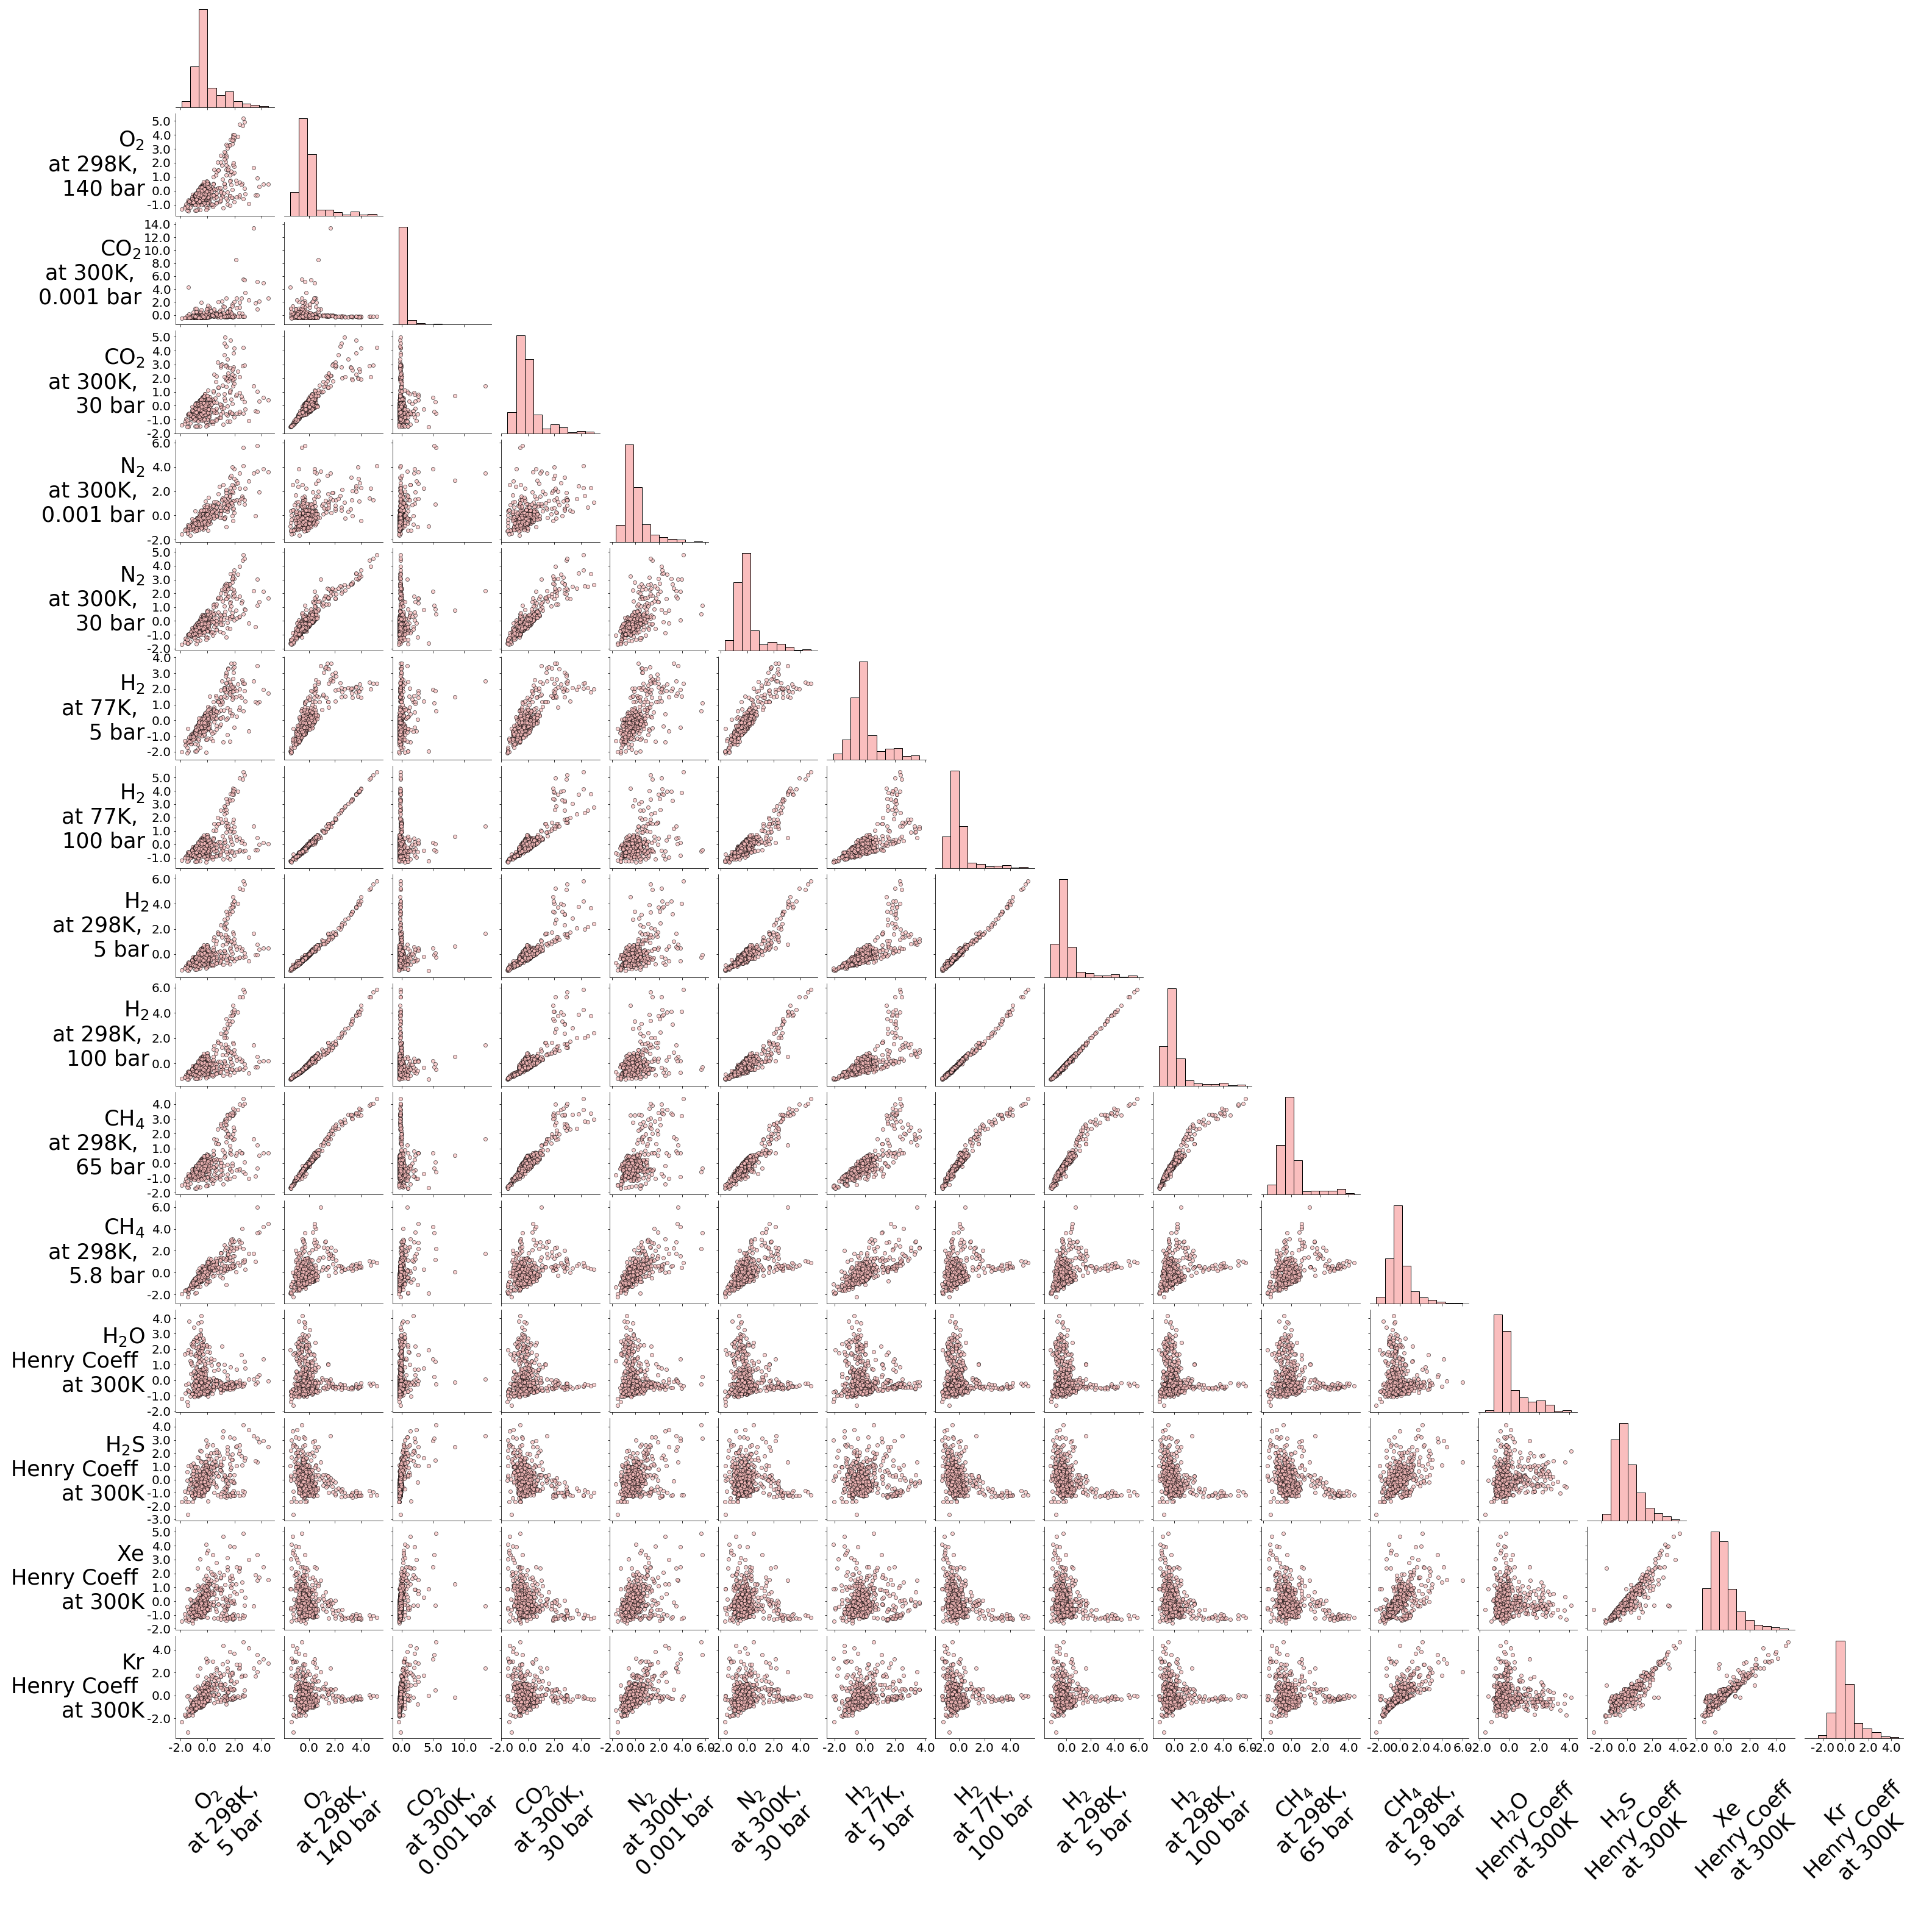

In [75]:
sns_plot = sns.pairplot(standardized_df, plot_kws={'s': 36, 'ec':'k', 'fc':'#fabebe', 'alpha':0.7}, diag_kws={'ec':'k', 'fc':'#fabebe'}, corner=True)
#sns_plot = sns.pairplot(standardized_df, kind='kde')
fig = sns_plot.fig;
#fig.savefig('scatterplot_matrix.pdf', format='pdf', dpi=60)
for axarray in sns_plot.axes:
    for axarray2 in axarray:
        try:
            axarray2.set_xlabel(title_dict[axarray2.get_xlabel()], fontsize=35, rotation=45, ha='center')
            axarray2.set_ylabel(title_dict[axarray2.get_ylabel()], fontsize=35, rotation=0, ha='right', va='center')
            axarray2.set_yticklabels(axarray2.get_yticks(), size=20)
            axarray2.set_xticklabels(axarray2.get_xticks(), size=20)
        except:
            pass

In [76]:
#plt.margins(0.2)
#plt.tight_layout()
fig.subplots_adjust(left = 0.1, bottom=0.1)
fig.savefig('scatterplot_matrix.pdf', format='pdf', dpi=200)

In [ ]:
data_df = pd.read_csv('appl_aiida_data.csv')
curated_df = copy.deepcopy(data_df[["ch4storage_298K", "h2sh2osel_300K", "h2storage_a", "h2storage_b", "h2storage_c", "o2storage_298K", "xekrsel_300K"]]) 
#                       "h2_77K_5bar", "h2_77K_100bar", "h2_298K_5bar", "h2_298K_100bar", "ch4_65bar", "ch4_5.8bar"]])
#log_h2o_henry = np.log10(10**5 * data_df["h2o_henry"]) # Converting units from mol/(kg-Pa) to mol/(kg-bar)
#log_h2s_henry = np.log10(10**5 * data_df["h2s_henry"]) #   1 Pa = 1e-5 bar 
log_xekr = np.log10(data_df["xekrsel_300K"])   #   Then taking the log10 of the Henry Coeffs to spread
log_h2sh2osel = np.log10(data_df["h2sh2osel_300K"])   #   their range more, so they won't group up around 0
curated_df['xekrsel_300K'] = log_xekr
curated_df['h2sh2osel_300K'] = log_h2sh2osel
#curated_df['xe_henry'] = log_xe_henry
#curated_df['kr_henry'] = log_kr_henry
standardized_df = copy.deepcopy(curated_df)
for col in standardized_df.columns:
    standardized_df[col] = (standardized_df[col] - np.mean(standardized_df[col])) / np.std(standardized_df[col])

In [ ]:
sns_plot = sns.pairplot(standardized_df)
#fig = sns_plot.fig
#fig.savefig('appl_scatterplot_matrix.png', format='png', dpi=30)

In [ ]:
sns_plot = sns.pairplot(curated_df)

In [77]:
result_df = pd.read_csv('result_df.csv')

In [78]:
result_df

,opt_k,opt_γ,target_sparsity,sparsity,test_rmse,test_ρ,test_rmse_simple_model,test_ρ_simple_model,ρ_o2_5bar,ρ_o2_140bar,...,simple_ρ_h2_77K_5bar,simple_ρ_h2_77K_100bar,simple_ρ_h2_298K_5bar,simple_ρ_h2_298K_100bar,simple_ρ_h2o,simple_ρ_h2s,simple_ρ_xe,simple_ρ_kr,simple_ρ_ch4_65bar,simple_ρ_ch4_5.8bar
0,8,5.179475,0.1,0.097879,0.345278,0.900154,0.751319,0.605046,0.970202,0.997114,...,0.830498,0.464931,0.579188,0.531222,0.093958,0.597323,0.415600,0.630667,0.499154,0.756432
1,7,10.985411,0.1,0.099330,0.341114,0.932812,0.772811,0.580879,0.961660,0.994659,...,0.735192,0.589018,0.711053,0.615143,0.244679,0.249857,0.054337,0.575681,0.706787,0.865962
2,12,5.179475,0.1,0.099777,0.337237,0.901576,0.837387,0.491865,0.953396,0.995850,...,0.825437,0.610169,0.608696,0.503695,-0.054231,-0.205669,0.010657,0.415224,0.441281,0.739947
3,13,5.179475,0.1,0.099665,0.348541,0.891260,0.794347,0.582368,0.965850,0.998361,...,0.772863,0.574605,0.514814,0.441891,0.086401,0.260995,0.320095,0.647155,0.648425,0.688056
4,10,6.250552,0.1,0.103683,0.332840,0.919007,0.791036,0.512349,0.949955,0.996448,...,0.714627,0.555388,0.525431,0.613288,0.103448,0.150856,0.134807,0.482629,0.307724,0.575595
5,11,6.250552,0.1,0.098437,0.634737,0.925344,0.978827,0.605308,0.970316,0.995066,...,0.780504,0.450612,0.659760,0.675914,0.071353,0.132762,0.268302,0.573069,0.653570,0.696054
6,9,5.179475,0.1,0.102232,0.388791,0.897291,0.804037,0.547746,0.845474,0.994712,...,0.702809,0.456182,0.597789,0.561429,0.033523,0.369952,0.112135,0.546539,0.790587,0.759457
7,7,5.179475,0.1,0.098996,0.454506,0.898499,0.881854,0.503859,0.931765,0.995536,...,0.752694,0.399002,0.662370,0.319005,-0.000478,0.087083,0.293205,0.503792,0.474462,0.658225
8,9,5.179475,0.1,0.099219,0.315377,0.901306,0.798070,0.582440,0.943969,0.996192,...,0.762639,0.630311,0.639575,0.630679,-0.003926,0.398813,0.092127,0.461378,0.401111,0.806548
9,10,5.179475,0.1,0.100893,0.384899,0.905251,0.842711,0.567048,0.970018,0.996936,...,0.816883,0.657173,0.658405,0.707648,-0.001025,0.285458,0.069593,0.570602,0.475743,0.702857


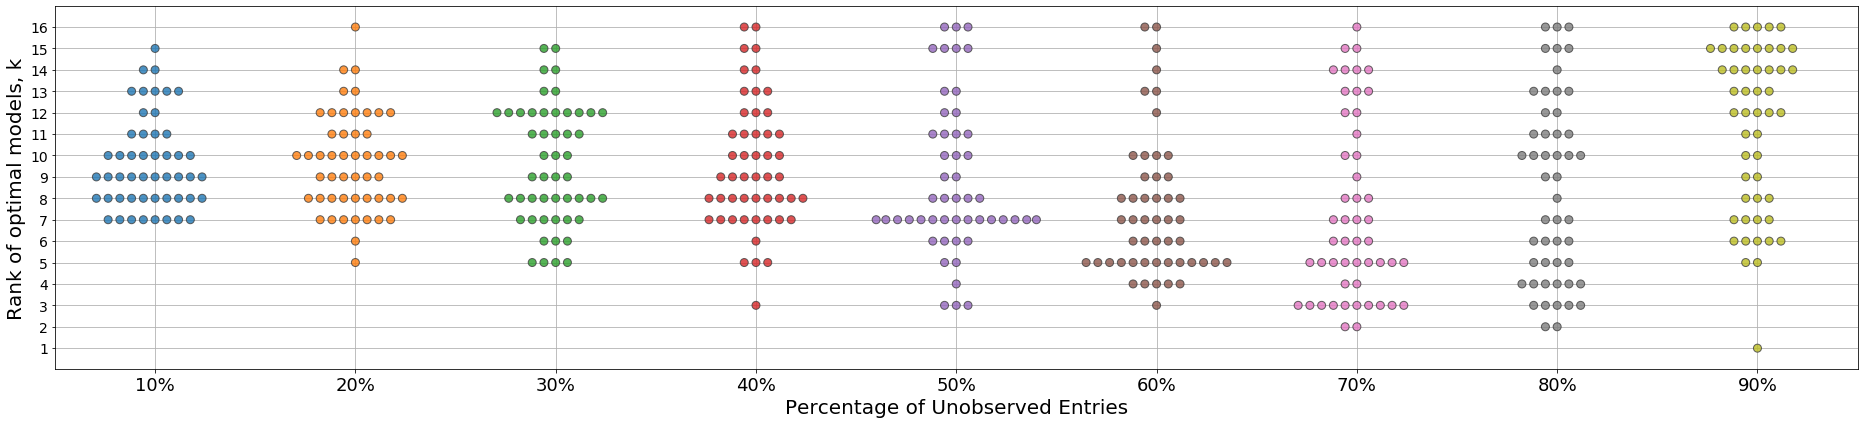

In [85]:
fig, ax = plt.subplots(figsize=(26,6))
ax = sns.swarmplot(x='target_sparsity', y='opt_k', data=result_df, ax=ax, edgecolor='gray', alpha=0.8, linewidth=1, size=8)
ax.set_xlabel("Percentage of Unobserved Entries", fontsize=20)
ax.set_ylabel("Rank of optimal models, k", fontsize=20)
ax.grid('on')
ax.set_xticklabels(["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"], size=18)
ytlabs = ax.get_yticks()
ax.set_yticks(range(1,17))
ax.set_yticklabels(range(1,17), size=14)
plt.tight_layout()
plt.savefig('opt_ks_60missing.pdf', format='pdf', dpi=300)


In [80]:
[x for x in ytlabs]

[-2.0, 0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0]

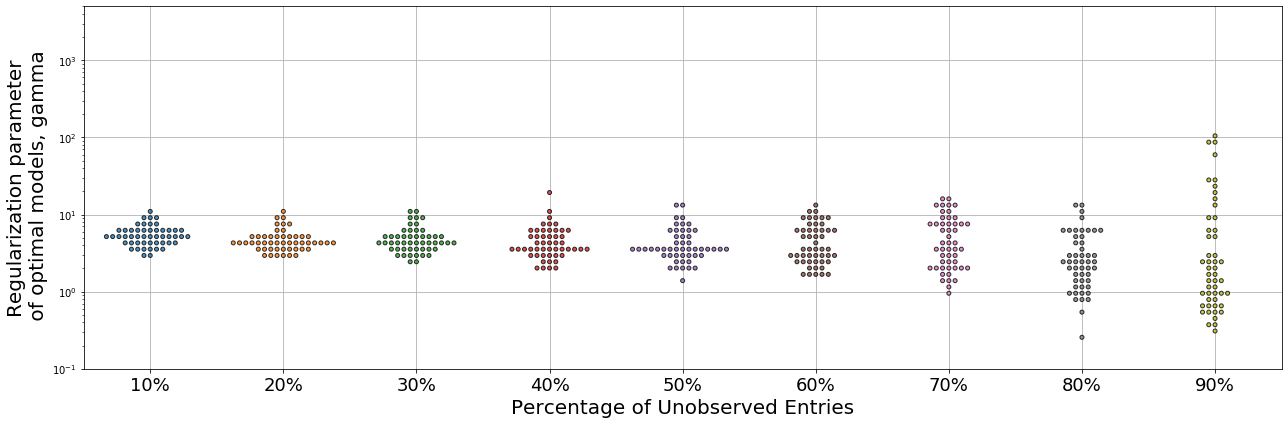

In [81]:
fig, ax = plt.subplots(figsize=(18,6))
ax.set_yscale('log')
sns.swarmplot(x='target_sparsity', y='opt_γ', data=result_df, edgecolor='k', alpha=0.8, linewidth=1, size=4)
ax.set_xlabel("Percentage of Unobserved Entries", fontsize=20)
ax.grid('on')
ax.set_xticklabels(["10%", "20%", "30%", "40%", "50%", "60%", "70%", "80%", "90%"], size=18)
ax.set_ylabel("Regularization parameter\n of optimal models, gamma", fontsize=20)
ax.set_ylim([1e-1, 5e3])
ax.grid('on')
plt.tight_layout()
plt.savefig('opt_gammass_60missing.pdf', format='pdf', dpi=300)

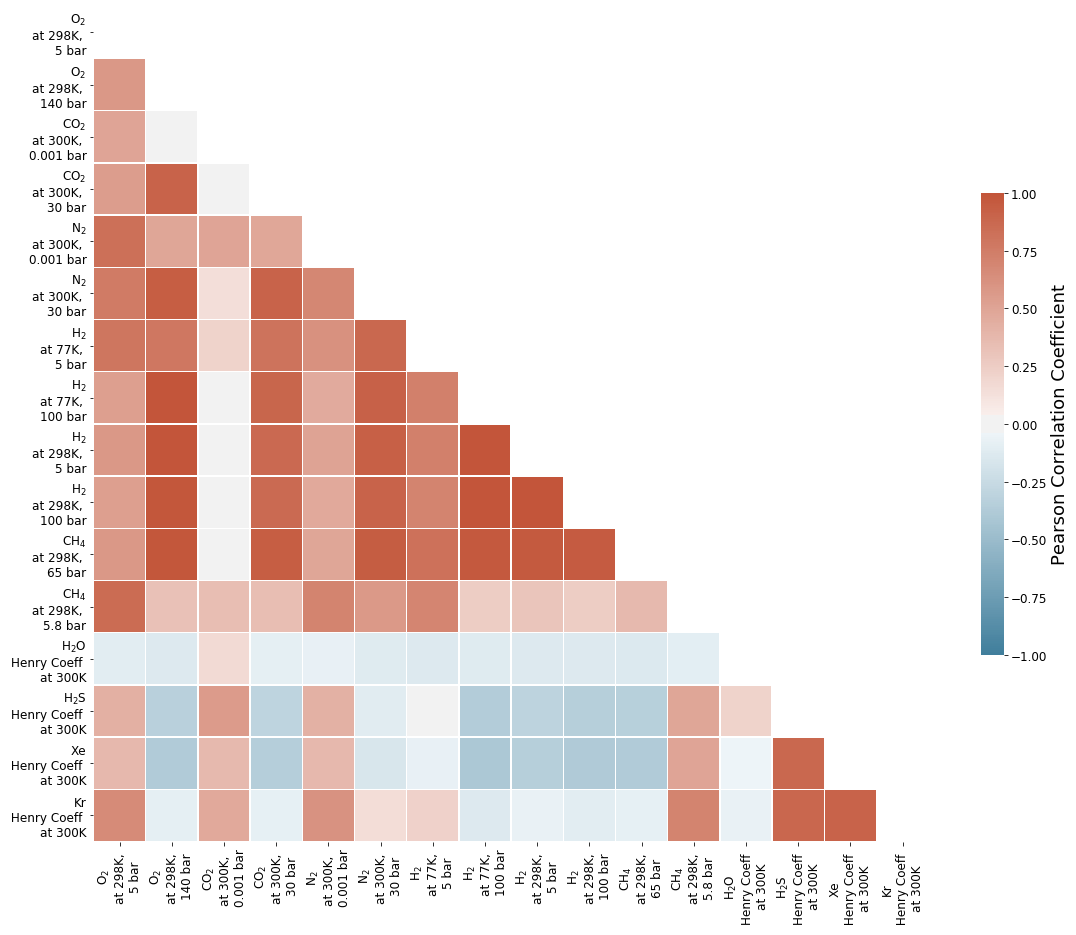

In [72]:
fig, ax = plt.subplots(figsize=(16,14))
corr = curated_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
#cmap = sns.light_palette("purple")
hmap = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, xticklabels=[title_dict[x] for x in standardized_df.columns], 
                   yticklabels=[title_dict[x] for x in standardized_df.columns], square=True, vmax=1.0, vmin=-1.0, 
                   linewidth=.5, cbar_kws={"shrink": .5, 'label':'Pearson Correlation Coefficient'})
hmap.axes.collections[0].colorbar.set_label('Pearson Correlation Coefficient', size=18)
for t in hmap.axes.collections[0].colorbar.ax.get_yticklabels():
    t.set_fontsize(12)
for t in hmap.axes.get_yticklabels():
    t.set_fontsize(12)
for t in hmap.axes.get_xticklabels():
    t.set_fontsize(12)
plt.tight_layout()
plt.savefig('corr_matrix.pdf', format='pdf', dpi=300)